In [1]:
!date

Sun Oct 27 03:02:59 PDT 2024


In [2]:
%env CONDA_PREFIX

'/c4/home/derek/miniconda3/envs/scquint_4'

# Submodel metrics

In [36]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
# process PARclip table

RBP = "AGO1 AGO2 AGO3 CAPRIN1 CPSF1 CPSF3 CPSF4 CPSF6 CPSF7 CSTF2 CSTF2T DICER1 DND1 EIF3A EIF3D EIF3G ELAVL1 ELAVL2 ELAVL3 ELAVL4 EWSR1 FBL FIP1L1 FMR1iso1 FMR1iso7 FUS FXR1 FXR2 GFP(G35) GFP(G45) HNRNPD IGF2BP1 IGF2BP2 IGF2BP3 L1RE1 LIN28A LIN28B MBNL1 MOV10 NOP56 NOP58 NUDT21 LINE-1-ORF1p NONO TENT4B(PAPD5) PUM2 QKI RBM10 RBM20 RBPMS RTCB SRRM4 SSB TAF15 TARDBP UPF1 XPO5 ZC3H7B ZFP36"

AUROC = "0.789076 0.853832 0.868226 0.755036 0.770088 0.798064 0.778281 0.787158 0.793916 0.815647 0.842871 0.857085 0.820734 0.882287 0.869932 0.891675 0.896556 0.926606 0.943415 0.934444 0.852801 0.906787 0.803026 0.867917 0.896127 0.901412 0.862783 0.803092 0.820182 0.838807 0.942418 0.826114 0.839561 0.840454 0.961325 0.785889 0.923507 0.982158 0.828301 0.924164 0.930788 0.850143 0.971041 0.925687 0.8492 0.946767 0.97455 0.860757 0.908388 0.971549 0.773793 0.803274 0.918654 0.878692 0.952737 0.812371 0.837698 0.867818 0.933268"

AP = "0.317035 0.49748 0.485672 0.216009 0.233365 0.118253 0.0757451 0.259414 0.542165 0.3 0.658515 0.241041 0.457522 0.202734 0.124661 0.134418 0.731773 0.60828 0.716039 0.581832 0.201107 0.347475 0.300094 0.26645 0.520597 0.463117 0.2582 0.180022 0.0609622 0.111121 0.47266 0.192926 0.291862 0.422296 0.589827 0.167328 0.448803 0.944225 0.408187 0.687188 0.676819 0.26264 0.673126 0.383958 0.121876 0.718361 0.642795 0.490855 0.5935 0.784266 0.0252931 0.311076 0.52801 0.278177 0.733116 0.119511 0.293879 0.370814 0.456097"


'AGO1 AGO2 AGO3 CAPRIN1 CPSF1 CPSF3 CPSF4 CPSF6 CPSF7 CSTF2 CSTF2T DICER1 DND1 EIF3A EIF3D EIF3G ELAVL1 ELAVL2 ELAVL3 ELAVL4 EWSR1 FBL FIP1L1 FMR1iso1 FMR1iso7 FUS FXR1 FXR2 GFP(G35) GFP(G45) HNRNPD IGF2BP1 IGF2BP2 IGF2BP3 L1RE1 LIN28A LIN28B MBNL1 MOV10 NOP56 NOP58 NUDT21 LINE-1-ORF1p NONO TENT4B(PAPD5) PUM2 QKI RBM10 RBM20 RBPMS RTCB SRRM4 SSB TAF15 TARDBP UPF1 XPO5 ZC3H7B ZFP36'

In [81]:
RBP = RBP.split(" ")

AUROC = [float(i) for i in AUROC.split(" ")]
AP = [float(i) for i in AP.split(" ")]

In [82]:
PARClip = pd.DataFrame(
    {'RBP':RBP, 'AUROC':AUROC, 'AP':AP}
)

In [83]:
K562 = pd.read_csv('DeepRipe_metrics_K562.csv')
HEPG2 = pd.read_csv('DeepRipe_metrics_HepG2.csv')

In [84]:
K562['model'] = 'eCLIP_K562'
HEPG2['model'] = 'eCLIP_HEPG2'

PARClip['model'] = 'PARCLIP_HEK293'

In [85]:
df = pd.concat([K562, HEPG2, PARClip])

[72, 70, 59]

In [106]:
sns.color_palette('plasma',n_colors=3)

[(0.494877, 0.01199, 0.657865),
 (0.798216, 0.280197, 0.469538),
 (0.973416, 0.585761, 0.25154)]

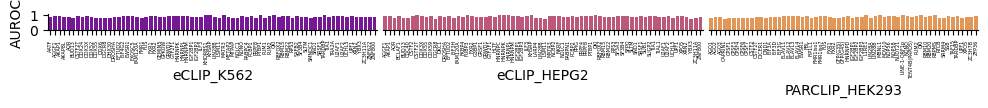

In [129]:
fig, axes = plt.subplots(1,3,figsize=(12,.2), gridspec_kw={'width_ratios':df.model.value_counts().tolist()})

fig.subplots_adjust(wspace=0.02, hspace=0)

for i, model in enumerate(df.model.unique()):
    
    sns.barplot(    df[df.model == model], 
            x='RBP',
            y='AUROC',
            ax=axes[i], 
            color=sns.color_palette('plasma',n_colors=3)[i]
           )
    
    axes[i].set_xlabel(df[df.model == model]['model'].unique()[0])
    
    # axes[i].minorticks_on()
    
    if i != 0:
        axes[i].set_ylabel('')
        axes[i].set_yticks([])
        axes[i].spines['left'].set_visible(False)
    
    axes[i].tick_params(axis='x', labelrotation=90, labelsize=3.5)
    
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    
    # axes[i].grid(axis='y')
    
# fig.savefig('./plots/AUROC_barplot.pdf')


    

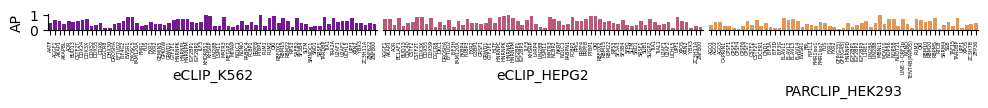

In [131]:
fig, axes = plt.subplots(1,3,figsize=(12,.2), gridspec_kw={'width_ratios':df.model.value_counts().tolist()})

fig.subplots_adjust(wspace=0.02, hspace=0)

for i, model in enumerate(df.model.unique()):
    
    sns.barplot(    df[df.model == model], 
            x='RBP',
            y='AP',
            ax=axes[i], 
            color=sns.color_palette('plasma',n_colors=3)[i]
           )
    
    axes[i].set_xlabel(df[df.model == model]['model'].unique()[0])
    
    # axes[i].minorticks_on()
    
    if i != 0:
        axes[i].set_ylabel('')
        axes[i].set_yticks([])
        axes[i].spines['left'].set_visible(False)
    
    axes[i].tick_params(axis='x', labelrotation=90, labelsize=3.5)
    
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    
    # axes[i].grid(axis='y')
    
fig.savefig('./plots/AP_barplot.pdf')
